In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data
data = pd.read_csv('btc_1h.csv')
data.drop(columns='timestamp',inplace=True)
data.head()

,open,high,low,close,volume
0,4261.48,4313.62,4261.32,4308.83,47.181009
1,4308.83,4328.69,4291.37,4315.32,23.234916
2,4330.29,4345.45,4309.37,4324.35,7.229691
3,4316.62,4349.99,4287.41,4349.99,4.443249
4,4333.32,4377.85,4333.32,4360.69,0.972807


In [4]:
data['target'] = (np.sign(data['close']-data['open'])+1)/2
data['f1'] = data['high']-data['open']
data['f2'] = data['close']-data['low']
data.head()

,open,high,low,close,volume,target,f1,f2
0,4261.48,4313.62,4261.32,4308.83,47.181009,1.0,52.14,47.51
1,4308.83,4328.69,4291.37,4315.32,23.234916,1.0,19.86,23.95
2,4330.29,4345.45,4309.37,4324.35,7.229691,0.0,15.16,14.98
3,4316.62,4349.99,4287.41,4349.99,4.443249,1.0,33.37,62.58
4,4333.32,4377.85,4333.32,4360.69,0.972807,1.0,44.53,27.37


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61447 entries, 0 to 61446
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    61447 non-null  float64
 1   high    61447 non-null  float64
 2   low     61447 non-null  float64
 3   close   61447 non-null  float64
 4   volume  61447 non-null  float64
 5   target  61447 non-null  float64
 6   f1      61447 non-null  float64
 7   f2      61447 non-null  float64
dtypes: float64(8)
memory usage: 3.8 MB


In [6]:
# feature and target separation
X = data.drop(columns=['open','close','target'])
y = data['target']

In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build LSTM model
model1 = Sequential()
model1.add(LSTM(64, activation='relu',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Dense(units=8,activation='relu'))
model1.add(Dense(units=1,activation='tanh'))

# Compile model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


# Train model
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=512)

# Evaluate model
loss1, accuracy1 = model1.evaluate(X_test,y_test)
print(f'model_1 loss value is: {loss1} \n')
print(f'model_1 accuracy is: {accuracy1}')

Epoch 1/100
85/85 [==============================] - 4s 18ms/step - loss: 1.1637 - accuracy: 0.4933
Epoch 2/100
85/85 [==============================] - 2s 18ms/step - loss: 0.6946 - accuracy: 0.5136
Epoch 3/100
85/85 [==============================] - 2s 18ms/step - loss: 0.6930 - accuracy: 0.5181
Epoch 4/100
85/85 [==============================] - 2s 19ms/step - loss: 0.6911 - accuracy: 0.5260
Epoch 5/100
85/85 [==============================] - 2s 21ms/step - loss: 0.6867 - accuracy: 0.5411
Epoch 6/100
85/85 [==============================] - 2s 20ms/step - loss: 0.6820 - accuracy: 0.5558
Epoch 7/100
85/85 [==============================] - 2s 18ms/step - loss: 0.6757 - accuracy: 0.5676
Epoch 8/100
85/85 [==============================] - 1s 17ms/step - loss: 0.6693 - accuracy: 0.5815
Epoch 9/100
85/85 [==============================] - 2s 19ms/step - loss: 0.6619 - accuracy: 0.5930
Epoch 10/100
85/85 [==============================] - 2s 19ms/step - loss: 0.6562 - accuracy: 0.6069

85/85 [==============================] - 2s 19ms/step - loss: 0.4206 - accuracy: 0.8080
Epoch 83/100
85/85 [==============================] - 1s 18ms/step - loss: 0.4200 - accuracy: 0.8060
Epoch 84/100
85/85 [==============================] - 2s 19ms/step - loss: 0.4207 - accuracy: 0.8091
Epoch 85/100
85/85 [==============================] - 2s 20ms/step - loss: 0.4202 - accuracy: 0.8086
Epoch 86/100
85/85 [==============================] - 2s 19ms/step - loss: 0.4185 - accuracy: 0.8076
Epoch 87/100
85/85 [==============================] - 1s 17ms/step - loss: 0.4238 - accuracy: 0.8059
Epoch 88/100
85/85 [==============================] - 1s 17ms/step - loss: 0.4201 - accuracy: 0.8079
Epoch 89/100
85/85 [==============================] - 1s 17ms/step - loss: 0.4192 - accuracy: 0.8074
Epoch 90/100
85/85 [==============================] - 1s 17ms/step - loss: 0.4204 - accuracy: 0.8073
Epoch 91/100
85/85 [==============================] - 1s 17ms/step - loss: 0.4203 - accuracy: 0.8081
Epo

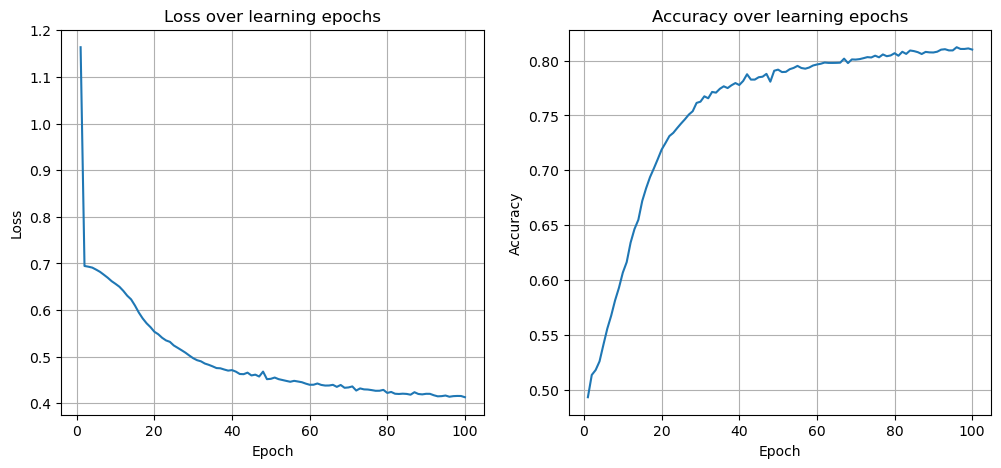

In [28]:
fig,ax = plt.subplots(1,2,figsize=[12,5])
ax[0].plot(np.arange(1,101),history1.history['loss'])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss over learning epochs')
ax[0].grid()
ax[1].plot(np.arange(1,101),history1.history['accuracy'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy over learning epochs')
ax[1].grid()

In [30]:
# Build SimpleRNN model
model2 = Sequential()
model2.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(units=32, activation='relu', return_sequences=True))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(units=8, activation='relu'))
model2.add(Dense(units=1,activation='tanh'))

# Compile model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=512)

# Evaluate model
loss2, accuracy2 = model2.evaluate(X_test,y_test)
print(f'model_2 loss value is: {loss2} \n')
print(f'model_2 accuracy is: {accuracy2}')

Epoch 1/100
85/85 [==============================] - 5s 17ms/step - loss: 0.8627 - accuracy: 0.5196
Epoch 2/100
85/85 [==============================] - 2s 18ms/step - loss: 0.6553 - accuracy: 0.6037
Epoch 3/100
85/85 [==============================] - 1s 17ms/step - loss: 0.6157 - accuracy: 0.6598
Epoch 4/100
85/85 [==============================] - 1s 16ms/step - loss: 0.5874 - accuracy: 0.6922
Epoch 5/100
85/85 [==============================] - 1s 17ms/step - loss: 0.5638 - accuracy: 0.7125
Epoch 6/100
85/85 [==============================] - 1s 17ms/step - loss: 0.5385 - accuracy: 0.7281
Epoch 7/100
85/85 [==============================] - 1s 15ms/step - loss: 0.5272 - accuracy: 0.7388
Epoch 8/100
85/85 [==============================] - 1s 16ms/step - loss: 0.5068 - accuracy: 0.7538
Epoch 9/100
85/85 [==============================] - 1s 16ms/step - loss: 0.4938 - accuracy: 0.7604
Epoch 10/100
85/85 [==============================] - 1s 16ms/step - loss: 0.4841 - accuracy: 0.7678

85/85 [==============================] - 1s 15ms/step - loss: 0.3716 - accuracy: 0.8300
Epoch 83/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3714 - accuracy: 0.8315
Epoch 84/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3736 - accuracy: 0.8312
Epoch 85/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3700 - accuracy: 0.8332
Epoch 86/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3720 - accuracy: 0.8316
Epoch 87/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3710 - accuracy: 0.8306
Epoch 88/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3687 - accuracy: 0.8311
Epoch 89/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3695 - accuracy: 0.8332
Epoch 90/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3710 - accuracy: 0.8328
Epoch 91/100
85/85 [==============================] - 1s 15ms/step - loss: 0.3671 - accuracy: 0.8357
Epo

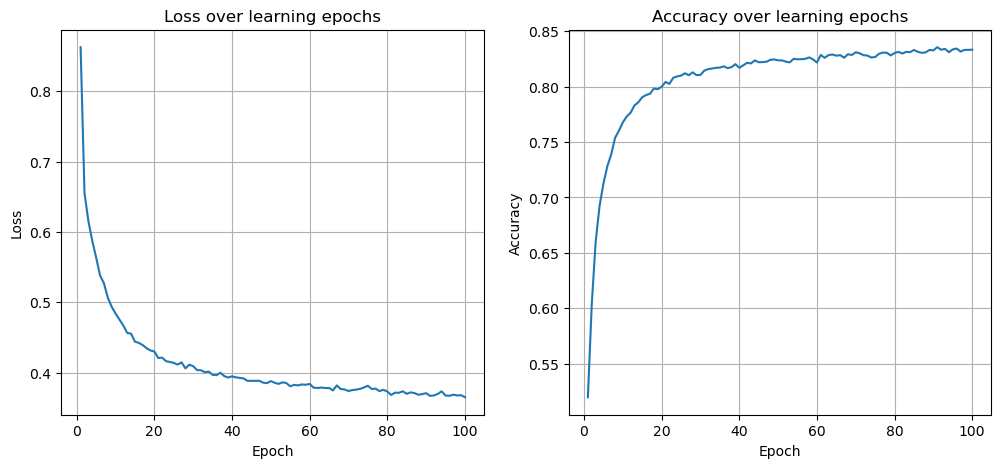

In [31]:
fig,ax = plt.subplots(1,2,figsize=[12,5])
ax[0].plot(np.arange(1,101),history2.history['loss'])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss over learning epochs')
ax[0].grid()
ax[1].plot(np.arange(1,101),history2.history['accuracy'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy over learning epochs')
ax[1].grid()